<a href="https://colab.research.google.com/github/majavarsava/End-To-End-NLP-analiza-TED-talkova/blob/main/RADNA_VERZIJA_End_to_end_NLP_analiza_TED_Talkova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. End-to-end NLP analiza TED Talkova (na temu psihologije i međuljudskih odnosa)
Cilj projekta je izgradnja i analiza end-to-end sustava za obradu govorenog sadržaja primjenom metoda NLP-a, pri čemu se polazi od audio zapisa TED Talkova te se postupno provodi automatska transkripcija govora i višeslojna analiza dobivenog teksta. Projekt se fokusira na TED Talkove iz područja psihologije i međuljudskih odnosa (npr. ljubav, privrženost, emocionalne veze), koji predstavljaju semantički bogat i tematski konzistentan skup govornog materijala.
Analiza obuhvaća pretvorbu govora u tekst, normalizaciju i lingvističku obradu transkripata, automatsko sažimanje sadržaja te otkrivanje tematske strukture govora. Poseban naglasak stavlja se na usporedbu rezultata dobivenih na temelju automatski generiranih transkripata i službenih TED transkripata, kako bi se analizirao utjecaj pogrešaka automatskog prepoznavanja govora na daljnje NLP zadatke.  
Korišteni skup podataka (10-20 ted talkova):
TED-LIUM Corpus – javno dostupni skup audio zapisa TED Talkova s pripadajućim službenim transkriptima, često korišten u ASR istraživanjima

TED Talks Dataset (Kaggle) – metapodaci i transkripti TED Talkova

TED službena web stranica – odabrani audio zapisi i službeni transkripti za manji broj govora

Korištene tehnike:
1. Automatsko prepoznavanje govora
2. Osnovna obrada teksta i POS tagging
3. Ekstraktivno sažimanje teksta
4. Topic modelling i word embeddings
Očekivani rezultati:
Očekuje se da će projekt pokazati kako je moguće izgraditi end-to-end NLP sustav za analizu govorenog sadržaja te kako kvaliteta automatske transkripcije utječe na rezultate sažimanja i tematske analize. Rezultati će pružiti uvid u dominantne teme i jezične obrasce u TED Talkovima iz područja psihologije i međuljudskih odnosa, kao i u ograničenja i prednosti primjene NLP metoda na automatski generirane transkripte govora.

# End-to-End NLP analiza TED Talkova (Psihologija i međuljudski odnosi)

Potrebni importi i slično

In [ ]:
from pathlib import Path
import pandas as pd


import jiwer

## 1. Dataset i odabir govora

U ovom projektu koristi se TED-LIUM corpus i TED Talks metadata dataset kako bi se odabrali i analizirali TED Talkovi iz područja psihologije i međuljudskih odnosa. Razlozi odabira tih tema su semantički bogati govori, puno emocija, osoba i pojmova što nam je idealno za NER, jasne teme te dovoljno dugi govori za ASR i sažimanje.


2. Izvor podataka
Primarni dataset izvučen s https://www.ted.com/
- sadrži videozapise TED talkova i službene transkripte tih istih videozapisa

3. Konkretni govori koje ćemo uzeti:
| Tema                         | Govor                                                                           | Video link                                                                                                                                                                                                                       |
| ---------------------------- | ------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Ljubav                       | *The brain in love* – Helen Fisher                                              | [https://www.ted.com/talks/helen_fisher_the_brain_in_love](https://www.ted.com/talks/helen_fisher_the_brain_in_love)                                                                                                             |
| Ranjiivost i odnosi          | *The power of vulnerability* – Brené Brown                                      | [https://www.ted.com/talks/brene_brown_the_power_of_vulnerability](https://www.ted.com/talks/brene_brown_the_power_of_vulnerability)                                                                                             |
| Sreća i smisao života        | *What makes a good life?* – Robert Waldinger                                    | [https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness](https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness)   |
| Privrženost i nevjera        | *Why we love, why we cheat* – Helen Fisher                                      | [https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat](https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat)                                                                                               |
| Emocije i sram               | *Listening to shame* – Brené Brown                                              | [https://www.ted.com/talks/brene_brown_listening_to_shame](https://www.ted.com/talks/brene_brown_listening_to_shame)                                                                                                             |
| Partnerski odnosi            | *The secret to desire in a long-term relationship* – Esther Perel               | [https://www.ted.com/talks/esther_perel_the_secret_to_desire_in_a_long_term_relationship](https://www.ted.com/talks/esther_perel_the_secret_to_desire_in_a_long_term_relationship)                                               |
| Psihologija stresa           | *How to make stress your friend* – Kelly McGonigal                              | [https://www.ted.com/talks/kelly_mcgonigal_how_to_make_stress_your_friend](https://www.ted.com/talks/kelly_mcgonigal_how_to_make_stress_your_friend)                                                                             |
| Mentalno zdravlje            | *Depression, the secret we share* – Andrew Solomon                              | [https://www.ted.com/talks/andrew_solomon_depression_the_secret_we_share](https://www.ted.com/talks/andrew_solomon_depression_the_secret_we_share)                                                                               |
| Emocionalna inteligencija    | *The surprising science of happiness* – Dan Gilbert                             | [https://www.ted.com/talks/dan_gilbert_the_surprising_science_of_happiness](https://www.ted.com/talks/dan_gilbert_the_surprising_science_of_happiness)                                                                           |
| Govor tijela i samopouzdanje | *Your body language may shape who you are* – Amy Cuddy                          | [https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are](https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are)                                                                     |
| Očekivanja u vezama          | *Your relationship expectations could be holding you back* – S. Yates-Anyabwile | [https://www.ted.com/talks/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back](https://www.ted.com/talks/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back) |
| Ljubav (definicija)          | *What is love?* – Brad Troeger                                                  | [https://www.ted.com/talks/brad_troeger_what_is_love](https://www.ted.com/talks/brad_troeger_what_is_love)                                                                                                                       |
| Prijateljstvo                | *Why friendship can be just as meaningful as romantic love* – Rhaina Cohen      | [https://www.ted.com/talks/rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love](https://www.ted.com/talks/rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love)                                                                                         |
| Smisao života                | *How to live a meaningful life* – Brian S. Lowery                               | [https://www.ted.com/talks/brian_s_lowery_how_to_live_a_meaningful_life](https://www.ted.com/talks/brian_s_lowery_how_to_live_a_meaningful_life)                                                                                 |
| Ljubav i hrabrost            | *To love is to be brave* – Kelly Corrigan                                       | [https://www.ted.com/talks/kelly_corrigan_to_love_is_to_be_brave](https://www.ted.com/talks/kelly_corrigan_to_love_is_to_be_brave)                                                                                               |


Kriteriji odabira:
- tagovi: psychology, love, relationships, emotions, mental health
- trajanje 10-20min
- engleski jezik
- jasan govor

Govori su unaprijed grupirani po semantički povezanim temama (ljubav, odnosi, emocije, mentalno zdravlje) kako bi se smanjio šum i povećala interpretabilnost rezultata topic modelinga.

In [1]:
from pathlib import Path

# Destination path in Google Colab
out_path = Path("/content/sample_data/ted_urls.txt")

# List of TED talk URLs
ted_urls = [
    "https://www.ted.com/talks/helen_fisher_the_brain_in_love",
    "https://www.ted.com/talks/brene_brown_the_power_of_vulnerability",
    "https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness",
    "https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat",
    "https://www.ted.com/talks/brene_brown_listening_to_shame",
    "https://www.ted.com/talks/esther_perel_the_secret_to_desire_in_a_long_term_relationship",
    "https://www.ted.com/talks/kelly_mcgonigal_how_to_make_stress_your_friend",
    "https://www.ted.com/talks/andrew_solomon_depression_the_secret_we_share",
    "https://www.ted.com/talks/dan_gilbert_the_surprising_science_of_happiness",
    "https://www.ted.com/talks/amy_cuddy_your_body_language_may_shape_who_you_are",
    "https://www.ted.com/talks/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back",
    "https://www.ted.com/talks/brad_troeger_what_is_love",
    "https://www.ted.com/talks/rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love",
    "https://www.ted.com/talks/yann_dall_aglio_love_you_re_doing_it_wrong",
    "https://www.ted.com/talks/brian_s_lowery_how_to_live_a_meaningful_life",
    "https://www.ted.com/talks/kelly_corrigan_to_love_is_to_be_brave",
]

# Ensure directory exists and write file
out_path.parent.mkdir(parents=True, exist_ok=True)
out_path.write_text("\n".join(ted_urls), encoding="utf-8")

print(f"Saved {len(ted_urls)} URLs to {out_path}")


Saved 16 URLs to /content/sample_data/ted_urls.txt


In [ ]:
!mkdir -p /content/data/mp3

!pip install -U yt-dlp

!yt-dlp -x --audio-format mp3 \
-o "/content/data/mp3/%(webpage_url_basename)s.%(ext)s" \
-a /content/sample_data/ted_urls.txt

# ostavlja samo naziv koji piše nakon /talks/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 59.8 MB/s eta 0:00:00
[TedTalk] Extracting URL: https://www.ted.com/talks/helen_fisher_the_brain_in_love
[TedTalk] helen_fisher_the_brain_in_love: Downloading webpage
[TedTalk] 307: Downloading m3u8 information
[info] 307: Downloading 1 format(s): hls-audio0-medium
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 157
[download] Destination: /content/data/mp3/helen_fisher_the_brain_in_love.mp4
[download] 100% of   15.73MiB in 00:00:03 at 4.15MiB/s
[FixupM3u8] Fixing MPEG-TS in MP4 container of "/content/data/mp3/helen_fisher_the_brain_in_love.mp4"
[ExtractAudio] Destination: /content/data/mp3/helen_fisher_the_brain_in_love.mp3
Deleting original file /content/data/mp3/helen_fisher_the_brain_in_love.mp4 (pass -k to keep)
[TedTalk] Extracting URL: https://www.ted.com/talks/brene_brown_the_power_of_vulnerability
[TedTalk] brene_brown_the_p

In [ ]:
# if any errors uncomment these lines and add the link you need to download
# errors could occur on TED website servers side, servers experiencing high traffic or maintenance
# so sometimes we will have to run it again when the info is available

!yt-dlp -x --audio-format mp3 \
-o "/content/data/mp3/%(webpage_url_basename)s.%(ext)s" \
"https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat"


[TedTalk] Extracting URL: https://www.ted.com/talks/helen_fisher_why_we_love_why_we_cheat
[TedTalk] helen_fisher_why_we_love_why_we_cheat: Downloading webpage
[TedTalk] 16: Downloading m3u8 information
[info] 16: Downloading 1 format(s): h264-1200k
[download] Destination: /content/data/mp3/helen_fisher_why_we_love_why_we_cheat.mp4
[download] 100% of  183.38MiB in 00:00:30 at 6.08MiB/s
[ExtractAudio] Destination: /content/data/mp3/helen_fisher_why_we_love_why_we_cheat.mp3
Deleting original file /content/data/mp3/helen_fisher_why_we_love_why_we_cheat.mp4 (pass -k to keep)


Konverzija MP3 -> WAV

In [ ]:
from pydub import AudioSegment
from pathlib import Path

DATA_DIR = Path("/content/data/mp3") # Assuming MP3s are in /content/
WAV_DIR = Path("/content/data/wav")
WAV_DIR.mkdir(parents=True, exist_ok=True)

for mp3_file in DATA_DIR.glob("*.mp3"):
  audio = AudioSegment.from_mp3(mp3_file)
  audio = audio.set_channels(1).set_frame_rate(16000) # Common sample rate for speech
  wav_path = WAV_DIR / (mp3_file.stem + ".wav")
  audio.export(wav_path, format="wav")

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


Pregled podataka

In [ ]:
import pandas as pd

rows = []
for wav in WAV_DIR.glob("*.wav"):
  rows.append({
      "file": wav.name,
      "path": str(wav)
  })

df_audio = pd.DataFrame(rows)
df_audio

,file,path
0,kelly_mcgonigal_how_to_make_stress_your_friend...,/content/data/wav/kelly_mcgonigal_how_to_make_...
1,kelly_corrigan_to_love_is_to_be_brave.wav,/content/data/wav/kelly_corrigan_to_love_is_to...
2,robert_waldinger_what_makes_a_good_life_lesson...,/content/data/wav/robert_waldinger_what_makes_...
3,stephanie_r_yates_anyabwile_your_relationship_...,/content/data/wav/stephanie_r_yates_anyabwile_...
4,brad_troeger_what_is_love.wav,/content/data/wav/brad_troeger_what_is_love.wav
5,esther_perel_the_secret_to_desire_in_a_long_te...,/content/data/wav/esther_perel_the_secret_to_d...
6,dan_gilbert_the_surprising_science_of_happines...,/content/data/wav/dan_gilbert_the_surprising_s...
7,brene_brown_listening_to_shame.wav,/content/data/wav/brene_brown_listening_to_sha...
8,helen_fisher_why_we_love_why_we_cheat.wav,/content/data/wav/helen_fisher_why_we_love_why...
9,amy_cuddy_your_body_language_may_shape_who_you...,/content/data/wav/amy_cuddy_your_body_language...


Transkripti sa stranice - kako bi mogli evaluirati točnost transkripta koji smo dobili iz videa.

Službeni TED transkripti prikupljeni su ručno s TED web-stranice zbog nepostojanja stabilnog javnog API-ja za transkripte te zbog činjenice da se sadržaj transkripata učitava dinamički. Transkripti su pohranjeni kao obične tekstualne datoteke te su prije daljnje NLP obrade provedeni osnovni postupci normalizacije teksta.

In [2]:
from pathlib import Path

official_transcripts_not_cleaned_dir = Path("data/official_transcripts_not_cleaned")
official_transcripts_not_cleaned_dir.mkdir(parents=True, exist_ok=True)

# nakon pokretanja ovog koda će se napraviti direktorij za transkripte
# - trebamo ubaciti .txt fileove s repozitorija iz foldera "official_transcripts_not_cleaned"

official_transcripts_dir = Path("data/official_transcripts")
official_transcripts_dir.mkdir(parents=True, exist_ok=True)

In [3]:
import re
from pathlib import Path

def clean_ted_transcript(text: str) -> str:
    # micanje didaskalija
    text = re.sub(r"\[(Applause|Laughter|Music|Cheers|Video|Subtitle|Translation|.*)\]", "", text, flags=re.IGNORECASE)
    # micanje timestampova
    text = re.sub(r"\b\d{1,2}:\d{2}\b", "", text)
    # micanje interpunkcija (.,:!?;"'- etc.)
    text = re.sub(r"[.,:;!?\"\'\-()]", "", text)
    # brisanje praznih redova
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    # spajanje linija + razmak
    text = " ".join(lines)
    # Normalize multiple spaces
    text = re.sub(r"\s+", " ", text)

    text = text.lower()

    return text.strip()

source_dir = Path("/content/data/official_transcripts_not_cleaned")
target_dir = Path("/content/data/official_transcripts")
target_dir.mkdir(parents=True, exist_ok=True)

for file_path in source_dir.glob("*.txt"):
    target_path = target_dir / file_path.name

    if target_path.exists():
        print(f"Preskačem (već postoji): {file_path.name}")
        continue
    try:
      with open(file_path, "r", encoding="utf-8") as f:
          raw_text = f.read()

      clean_text = clean_ted_transcript(raw_text)

      with open(target_path, "w", encoding="utf-8") as f:
          f.write(clean_text)

      print(f"Očišćeno i spremljeno: {file_path.name}")

    except Exception as e:
      print(f"Greška prilikom obrade {file_path.name}: {e}")

print("Svi transkripti su očišćeni i spremljeni.")

Očišćeno i spremljeno: brad_troeger_what_is_love.txt
Očišćeno i spremljeno: kelly_corrigan_to_love_is_to_be_brave.txt
Očišćeno i spremljeno: helen_fisher_why_we_love_why_we_cheat.txt
Očišćeno i spremljeno: dan_gilbert_the_surprising_science_of_happiness.txt
Očišćeno i spremljeno: brene_brown_the_power_of_vulnerability.txt
Očišćeno i spremljeno: andrew_solomon_depression_the_secret_we_share.txt
Očišćeno i spremljeno: esther_perel_the_secret_to_desire_in_a_long_term_relationship.txt
Očišćeno i spremljeno: kelly_mcgonigal_how_to_make_stress_your_friend.txt
Očišćeno i spremljeno: helen_fisher_the_brain_in_love.txt
Očišćeno i spremljeno: amy_cuddy_your_body_language_may_shape_who_you_are.txt
Očišćeno i spremljeno: stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back.txt
Očišćeno i spremljeno: brene_brown_listening_to_shame.txt
Očišćeno i spremljeno: rhaina_cohen_why_friendship_can_be_just_as_meaningful_as_romantic_love.txt
Očišćeno i spremljeno: robert_waldin

ASR transkripcija - Whisper

In [ ]:
!pip install -q openai-whisper

import whisper
from pathlib import Path
import torch # Import torch to check for GPU availability

wav_folder = Path("/content/data/wav")
output_folder = Path("/content/data/asr_transcripts")
output_folder.mkdir(parents=True, exist_ok=True)

# Check if GPU is available and set device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = whisper.load_model("base", device=device)

for wav_file in wav_folder.glob("*.wav"):
  print(f"Processing {wav_file.name}...")
  result = model.transcribe(str(wav_file))
  transcript_text = result["text"]

  # Corrected: Use wav_file.stem to get the correct filename for each audio file
  output_file = output_folder / f"{wav_file.stem}.txt"
  with open(output_file, "w", encoding="utf-8") as f:
    f.write(transcript_text)

  print(f"Saved transcription to {output_file}")

print(f"All audio files have been transcribed and saved.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 15.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using device: cuda


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 65.1MiB/s]


Processing kelly_mcgonigal_how_to_make_stress_your_friend.wav...
Saved transcription to /content/data/asr_transcripts/kelly_mcgonigal_how_to_make_stress_your_friend.txt
Processing kelly_corrigan_to_love_is_to_be_brave.wav...
Saved transcription to /content/data/asr_transcripts/kelly_corrigan_to_love_is_to_be_brave.txt
Processing robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness.wav...
Saved transcription to /content/data/asr_transcripts/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness.txt
Processing stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back.wav...
Saved transcription to /content/data/asr_transcripts/stephanie_r_yates_anyabwile_your_relationship_expectations_could_be_holding_you_back.txt
Processing brad_troeger_what_is_love.wav...
Saved transcription to /content/data/asr_transcripts/brad_troeger_what_is_love.txt
Processing esther_perel_the_secret_to_desire_in_a_long_term_relat

Čišćenje transkriptiranih audiozapisa na isti način na koji smo očistili službene transkripte - kako bi ih mogli usporediti.

In [4]:
def clean_ted_transcript(text: str) -> str:
    # micanje timestampova
    text = re.sub(r"\b\d{1,2}:\d{2}\b", "", text)
    # micanje interpunkcija (.,:!?;"'- etc.)
    text = re.sub(r"[.,:;!?\"\'\-()]", "", text)
    # brisanje praznih redova
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    # spajanje linija + razmak
    text = " ".join(lines)
    # Normalize multiple spaces
    text = re.sub(r"\s+", " ", text)

    text = text.lower()

    return text.strip()

transcript_dir = Path("/content/data/asr_transcripts")

for file_path in transcript_dir.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        raw_text = f.read()

    clean_text = clean_ted_transcript(raw_text)

    # prepisivanje iste datoteke s očišćenim tekstom
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(clean_text)

print("Svi Whisper transkripti su očišćeni i spremljeni.")

Svi Whisper transkripti su očišćeni i spremljeni.


Evaluacija kvalitete Whisper transkripata u odnosu na službene TED transkripte.

WER (Word Error Rate), analiza grešaka, broj zamjena, umetaka i brisanja

In [5]:
!pip install jiwer

import jiwer
import pandas as pd
from pathlib import Path

whisper_dir = Path("/content/data/asr_transcripts")
official_dir = Path("/content/data/official_transcripts")
results = []
all_outputs = []

# Definiramo transformaciju (slično što si čistila tekst)
transformation = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemovePunctuation(),
    jiwer.Strip(),
    jiwer.RemoveMultipleSpaces()
])

for official_file in official_dir.glob("*.txt"):
    whisper_file = whisper_dir / official_file.name

    if not whisper_file.exists():
        print(f"Whisper transcript missing for {official_file.name}, skipping...")
        continue

    with open(official_file, "r", encoding="utf-8") as f:
        official_text = f.read()

    with open(whisper_file, "r", encoding="utf-8") as f:
        whisper_text = f.read()

    # Čišćenje teksta
    official_clean = transformation(official_text)
    whisper_clean = transformation(whisper_text)

    output = jiwer.process_words(official_clean, whisper_clean)

    # if output.wer > 0.07:
    #     print(f"\n=== {official_file.name}  (WER = {output.wer:.3f}) ===")
    #     print(jiwer.visualize_alignment(output, show_measures=True))

    results.append({
        "File": official_file.name,
        "WER": output.wer,
        "Substitutions": output.substitutions,
        "Insertions": output.insertions,
        "Deletions": output.deletions
    })

    all_outputs.append(output)


# Pretvaranje u DataFrame
df_results = pd.DataFrame(results)

# Sortiranje po WER (najveći problemi na vrhu)
df_results = df_results.sort_values(by="WER", ascending=False).reset_index(drop=True)

# Prikaz tablice
print(df_results)

# Prosječni WER
if not df_results.empty:
    avg_wer = df_results["WER"].mean()
    print(f"\nTotal files compared: {len(df_results)}")
    print(f"Average WER across all files: {avg_wer:.3f}")

if all_outputs:
    print("\nNajčešće greške u najgoroj datoteci:")
    worst_output = max(all_outputs, key=lambda o: o.wer)
    print(jiwer.visualize_error_counts(worst_output, top_k=10))


df_results.to_csv("/content/data/whisper_vs_official_wer.csv", index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.5 MB/s eta 0:00:00
                                                 File       WER  \
0   stephanie_r_yates_anyabwile_your_relationship_...  0.136397   
1           helen_fisher_why_we_love_why_we_cheat.txt  0.074194   
2   dan_gilbert_the_surprising_science_of_happines...  0.074084   
3                  helen_fisher_the_brain_in_love.txt  0.072097   
4    brian_s_lowery_how_to_live_a_meaningful_life.txt  0.071851   
5                  brene_brown_listening_to_shame.txt  0.062764   
6          brene_brown_the_power_of_vulnerability.txt  0.062195   
7   amy_cuddy_your_body_language_may_shape_who_you...  0.061915   
8   andrew_solomon_depression_the_secret_we_share.txt  0.049619   
9           kelly_corrigan_to_love_is_to_be_brave.txt  0.042608   
10  kelly_mcgonigal_how_to_make_stress_your_friend...  0.038194   
11  esther_perel_the_secret_to_desire_in_a_long_te...  0.038083   
12  rhaina_cohen_why_friendship_can_be_just_as_mea..

NLP pipeline

Nakon evaluacije kvalitete ASR transkripata, dobiveni tekst koristi se kao ulaz u standardni NLP pipeline. Cilj ove faze je analizirati lingvističku strukturu govora primjenom tokenizacije, lematizacije i označavanja vrsta riječi (POS tagging).

Dobiveni ASR transkripti podvrgnuti su standardnom NLP pipelineu koji uključuje tokenizaciju, lematizaciju i označavanje vrsta riječi (POS tagging) pomoću spaCy biblioteke. Analizirana je raspodjela osnovnih gramatičkih kategorija (imenice, glagoli, pridjevi i prilozi) kako bi se dobio uvid u lingvističku strukturu govora i stil TED predavanja iz područja psihologije i međuljudskih odnosa.

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install wordcloud matplotlib seaborn -q

import spacy
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# učitavanje svih ASR transkripata
TRANSCRIPT_DIR = Path("/content/data/asr_transcripts")

transcripts = {}

for file_path in TRANSCRIPT_DIR.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        transcripts[file_path.stem] = f.read()

In [3]:
# tokenizacija, lematizacija i POS tagging
def process_text_spacy(text):
    doc = nlp(text)

    tokens = []
    lemmas = []
    pos_tags = []

    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.text)
            lemmas.append(token.lemma_)
            pos_tags.append(token.pos_)

    return tokens, lemmas, pos_tags

In [4]:
# obrada cijelog korpusa
results = []

for talk_id, text in transcripts.items():
    tokens, lemmas, pos_tags = process_text_spacy(text)

    pos_counts = Counter(pos_tags)
    total_tokens = len(pos_tags)

    results.append({
        "talk_id": talk_id,
        "num_tokens": total_tokens,
        "num_types": len(set(lemmas)),
        "nouns": pos_counts.get("NOUN", 0) + pos_counts.get("PROPN", 0),
        "verbs": pos_counts.get("VERB", 0),
        "adjectives": pos_counts.get("ADJ", 0),
        "adverbs": pos_counts.get("ADV", 0),
    })

In [5]:
# tablica statistike
df_pos = pd.DataFrame(results)

# relativni udjeli
df_pos["noun_ratio"] = df_pos["nouns"] / df_pos["num_tokens"]
df_pos["verb_ratio"] = df_pos["verbs"] / df_pos["num_tokens"]
df_pos["adj_ratio"] = df_pos["adjectives"] / df_pos["num_tokens"]
df_pos["adv_ratio"] = df_pos["adverbs"] / df_pos["num_tokens"]

df_pos

# prosječna raspodjela vrsta riječi
mean_distribution = df_pos[
    ["noun_ratio", "verb_ratio", "adj_ratio", "adv_ratio"]
].mean()

mean_distribution

,0
noun_ratio,0.453970
verb_ratio,0.314693
adj_ratio,0.136000
adv_ratio,0.041309




Najčešće leme po POS kategoriji:
pos   lemma   
ADJ   good        73
      little      63
      bad         43
      romantic    40
      human       31
                  ..
VERB  get         60
      talk        58
X     b            1
      electro      1
      paradigm     1
Name: count, Length: 137, dtype: int64

Jednostavni Type-Token Ratio (TTR): 0.211



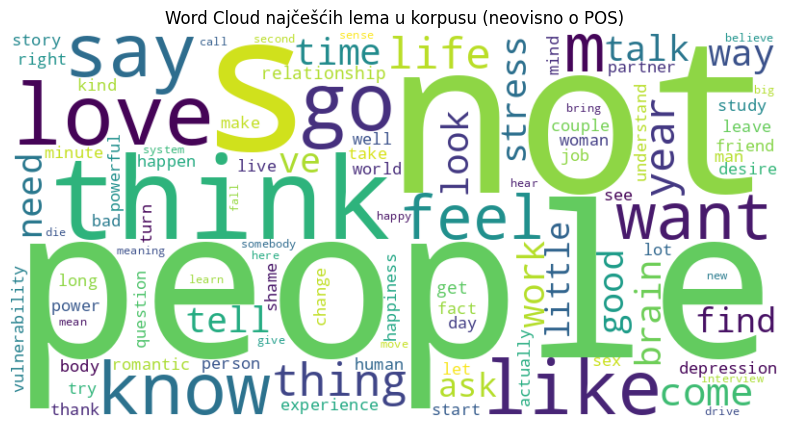


Prosječna duljina lema: 5.59 znakova


In [6]:
# najčešće riječi po POS kategoriji
all_lemmas = []
all_pos = []

for talk_id, text in transcripts.items():
    doc = nlp(text)
    for token in doc:
        if token.is_alpha and not token.is_stop:
            all_lemmas.append(token.lemma_)
            all_pos.append(token.pos_)

lemma_counter = Counter(all_lemmas)
top_lemmas = lemma_counter.most_common(50)

# najčešćih 15 po kategoriji
df_freq = pd.DataFrame({
    'lemma': all_lemmas,
    'pos': all_pos
})

top_by_pos = df_freq.groupby('pos')['lemma'].value_counts().groupby(level=0).head(15)

print("\n")
print("Najčešće leme po POS kategoriji:")
print(top_by_pos)

# leksička raznolikost - koliko je vokabular raznolik / ponavlja li se puno istih riječi
ttr = len(set(all_lemmas)) / len(all_lemmas) if all_lemmas else 0
print(f"\nJednostavni Type-Token Ratio (TTR): {ttr:.3f}\n")

# vizualizacija - word cloud sa svim lemama
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate_from_frequencies(lemma_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud najčešćih lema u korpusu (neovisno o POS)')
plt.show()

# prosječna duljina lema (u znakovima) – za uvid u složenost riječi
avg_length = sum(len(lemma) for lemma in all_lemmas) / len(all_lemmas) if all_lemmas else 0
print(f"\nProsječna duljina lema: {avg_length:.2f} znakova")

Named Entity Recognition


In [7]:
ner_results = {}

for talk, text in transcripts.items():
    doc = nlp(text)

    entities = [
        (ent.text, ent.label_)
        for ent in doc.ents
    ]

    ner_results[talk] = entities

ner_results[list(ner_results.keys())[0]][:15] #primjer pregleda za jedan govor

# filtriranje po tipu entiteta
TARGET_ENTITIES = {
    "PERSON",
    "ORG",
    "GPE",
    "LOC",
    "EVENT",
    "WORK_OF_ART"
}

filtered_ner = {}

for talk, entities in ner_results.items():
    filtered_ner[talk] = [
        (text, label)
        for text, label in entities
        if label in TARGET_ENTITIES
    ]

# statistika entiteta po govoru
ner_stats = []

for talk, entities in filtered_ner.items():
    labels = [label for _, label in entities]
    counts = Counter(labels)

    ner_stats.append({
        "talk": talk,
        "PERSON": counts.get("PERSON", 0),
        "ORG": counts.get("ORG", 0),
        "GPE": counts.get("GPE", 0),
        "LOC": counts.get("LOC", 0),
        "EVENT": counts.get("EVENT", 0),
        "WORK_OF_ART": counts.get("WORK_OF_ART", 0),
        "TOTAL_ENTITIES": len(entities)
    })

ner_df = pd.DataFrame(ner_stats)
ner_df

# najčešći entiteti u cijelom korpusu
all_entities = []

for entities in filtered_ner.values():
    all_entities.extend(entities)

entity_counter = Counter(all_entities)

entity_counter.most_common(20)


[(('the united states', 'GPE'), 8),
 (('america', 'GPE'), 5),
 (('new york', 'GPE'), 4),
 (('harvard', 'ORG'), 4),
 (('jim', 'PERSON'), 3),
 (('paris', 'GPE'), 3),
 (('aaron', 'PERSON'), 3),
 (('manila', 'GPE'), 3),
 (('joe', 'PERSON'), 3),
 (('china', 'GPE'), 2),
 (('africa', 'LOC'), 2),
 (('thomas', 'PERSON'), 2),
 (('the new york times', 'ORG'), 2),
 (('doc', 'ORG'), 2),
 (('lucy brown', 'PERSON'), 2),
 (('boston', 'GPE'), 2),
 (('john', 'PERSON'), 2),
 (('hannah', 'PERSON'), 2),
 (('leonardo davenci', 'PERSON'), 2),
 (('stanford', 'ORG'), 2)]

In [8]:
# ukupna statistika po tipu entiteta
total_counts = ner_df[['PERSON', 'ORG', 'GPE', 'LOC', 'EVENT', 'WORK_OF_ART']].sum()
print("Ukupno po tipu entiteta:\n", total_counts)
print("\nNajčešći tip:", total_counts.idxmax(), f"({total_counts.max()} pojavljivanja)")

Ukupno po tipu entiteta:
 PERSON         47
ORG            31
GPE            53
LOC             3
EVENT           1
WORK_OF_ART     0
dtype: int64

Najčešći tip: GPE (53 pojavljivanja)


/tmp/ipython-input-2303466635.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette="viridis")


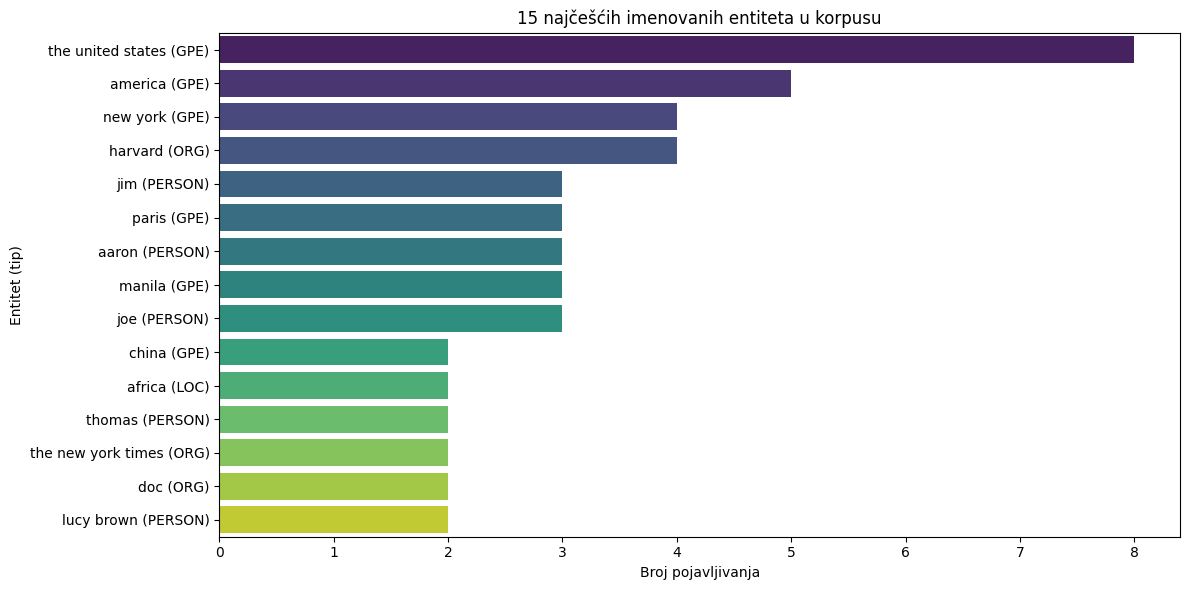

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top_entities = entity_counter.most_common(15)
labels = [f"{ent[0]} ({ent[1]})" for ent, count in top_entities]
counts = [count for ent, count in top_entities]

plt.figure(figsize=(12,6))
sns.barplot(x=counts, y=labels, palette="viridis")
plt.title("15 najčešćih imenovanih entiteta u korpusu")
plt.xlabel("Broj pojavljivanja")
plt.ylabel("Entitet (tip)")
plt.tight_layout()
plt.show()

TextRank ekstraktivno sažimanje

Ekstraktivno sažimanje primjenom algoritma TextRank koristi se za izdvajanje najinformativnijih rečenica iz automatski generiranih transkripata TED Talkova. Algoritam se temelji na grafovskom rangiranju rečenica prema njihovoj međusobnoj sličnosti te ne zahtijeva nadzirano učenje.
Cilj je smanjiti šum prisutan u ASR transkriptima i dobiti sažetke koji zadržavaju ključne semantičke informacije govora, što omogućuje daljnju analizu tema i usporedbu sadržaja među govorima.

In [10]:
!pip install nltk spacy -q
!python -m spacy download en_core_web_sm -q
!pip install nltk -q

import spacy
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path
from collections import defaultdict
import re

nltk.download('punkt')
nltk.download('punkt_tab')
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    # Ako model nije loadan, ponovno downloadaj
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("sentencizer")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 119.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
def get_sentences(text):
    # Prvo očisti šum
    text = re.sub(r'\[.*?\]', '', text)  # Ukloni [Laughter], [Applause] itd.
    text = re.sub(r'\s+', ' ', text).strip()  # Normaliziraj razmake

    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

    cleaned = []
    for s in sentences:
        if len(s) > 350:  # Ako je predugačka (>350 znakova) → ručno podijeli na manje chunkove
            words = s.split()
            for i in range(0, len(words), 30):  # ← OVO JE PROMIJENJENO: max 30 riječi po chunku
                chunk = ' '.join(words[i:i+30])
                if len(chunk) > 20:  # Preskoči prekratke
                    cleaned.append(chunk)
        elif 20 < len(s) < 350:
            cleaned.append(s)

    return cleaned if cleaned else [text]

In [12]:
def textrank_summarize(text, ratio=0.20, min_sentences=4, max_sentences=8, damping=0.85, max_iter=100):
    sentences = get_sentences(text)
    if len(sentences) == 0:
        print("Upozorenje: Nema detektiranih rečenica!")
        return []
    if len(sentences) < 15:
        ratio = 0.35  # Više rečenica za kratke

    if len(sentences) <= min_sentences:
        return sentences

    # TF-IDF
    vectorizer = TfidfVectorizer(stop_words="english", smooth_idf=True, min_df=2)
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Kosinusna sličnost
    sim_matrix = cosine_similarity(tfidf_matrix)
    np.fill_diagonal(sim_matrix, 0)

    # Normalizacija u prijelaznu matricu
    row_sums = sim_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # izbjegni dijeljenje s nulom
    transition_matrix = sim_matrix / row_sums

    # PageRank
    n = len(sentences)
    scores = np.ones(n) / n
    for _ in range(max_iter):
        scores = (1 - damping) / n + damping * transition_matrix.T.dot(scores)

    # Odabir top rečenica
    target_count = max(min_sentences, min(max_sentences, int(len(sentences) * ratio)))
    top_indices = np.argsort(-scores)[:target_count]
    top_indices = sorted(top_indices)  # očuvaj približan redoslijed

    return [sentences[i] for i in top_indices]

In [13]:
# obrada svih transkripata
ASR_DIR = Path("/content/data/asr_transcripts")
summaries = {}

for file_path in ASR_DIR.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read().strip()

    talk_id = file_path.stem
    summary_sentences = textrank_summarize(text, ratio=0.18)  # ~18% duljine

    summaries[talk_id] = {
        "original_sentences": len(get_sentences(text)),
        "summary_sentences": len(summary_sentences),
        "summary": summary_sentences
    }

    print(f"\n")
    print(f"{talk_id.upper()}")
    print(f"Original: {summaries[talk_id]['original_sentences']} rečenica")
    print(f"Sažetak:  {summaries[talk_id]['summary_sentences']} rečenica")
    print("SAŽETAK:")
    for i, s in enumerate(summary_sentences, 1):
        print(f"{i}. {s}")
    print()



BRAD_TROEGER_WHAT_IS_LOVE
Original: 29 rečenica
Sažetak:  5 rečenica
SAŽETAK:
1. what is love seriously gosh
2. sometimes you hate the person you love plus come on youve felt feelings like it before sort of in miniature your relationships with your family shape your relationships with partners
3. and your love for your partner may be in its own dynamic relationship healthy or totally weird with the love of your parents and siblings love is also a set
4. dont really date the way we think of dating or who just doesnt want to make out on the bus but if love is a thing that we can define
5. pleasing natural rewards in your nervous system perhaps these rewards are addictive perhaps love is a temporary or permanent addiction to a person just like a person can be addicted



KELLY_CORRIGAN_TO_LOVE_IS_TO_BE_BRAVE
Original: 56 rečenica
Sažetak:  8 rečenica
SAŽETAK:
1. just $3800 in travelers checks which if youre under 30 it was like a little booklet of perforated i dont know and some expired

Word Embeddings - Word2Vec

Word2Vec model treniran je nad ASR transkriptima TED Talkova kako bi se dobila vektorska reprezentacija riječi temeljena na kontekstu. Time je omogućena analiza semantičke sličnosti ključnih pojmova vezanih uz ljubav, odnose i psihološke procese.

In [14]:
!pip install gensim -q

import gensim.downloader as api
from gensim.models import Word2Vec
import plotly.express as px
from sklearn.manifold import TSNE

In [15]:
glove_model = api.load("glove-wiki-gigaword-100")

def preprocess_for_embeddings(text):
    doc = nlp(text)
    return [
        token.lemma_
        for token in doc
        if token.is_alpha and not token.is_stop
    ]

documents = []

for file_path in ASR_DIR.glob("*.txt"):
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    tokens = preprocess_for_embeddings(text)
    documents.append(tokens)

print("Broj dokumenata:", len(documents))
print("Primjer tokena:", documents[0][:20])

w2v_model = Word2Vec(
    sentences=documents,
    vector_size=100,
    window=5,
    min_count=3,
    workers=4
)

for word in glove_model.key_to_index:
    if word in w2v_model.wv:
        w2v_model.wv[word] = glove_model[word]

key_terms = ['love', 'stress', 'happiness', 'relationship', 'vulnerability', 'depression', 'friendship']

for term in key_terms:
    if term in w2v_model.wv:
        print(f"\nSličnosti za '{term}':")
        print(w2v_model.wv.most_similar(term, topn=10))
    else:
        print(f"\n'{term}' nije u modelu.")

Broj dokumenata: 15
Primjer tokena: ['love', 'seriously', 'gosh', 'love', 'verb', 'noun', 'universal', 'truth', 'ideal', 'common', 'thread', 'religion', 'cult', 'neurological', 'phenomenon', 's', 'shortage', 'answer', 'encompass', 'conquer']

Sličnosti za 'love':
[('life', 0.7287957668304443), ('dream', 0.7267670035362244), ('wonder', 0.70945805311203), ('mind', 0.7063044905662537), ('true', 0.7032780647277832), ('feel', 0.6982081532478333), ('happy', 0.6980456113815308), ('kind', 0.6957338452339172), ('soul', 0.6952476501464844), ('good', 0.6919699907302856)]

Sličnosti za 'stress':
[('pain', 0.725872278213501), ('anxiety', 0.7095138430595398), ('psychological', 0.6904554963111877), ('physical', 0.6795199513435364), ('risk', 0.6541153788566589), ('discomfort', 0.6437202095985413), ('pressure', 0.6311295628547668), ('trauma', 0.6310915946960449), ('disorder', 0.6305811405181885), ('illness', 0.6275010704994202)]

Sličnosti za 'happiness':
[('joy', 0.6801809668540955), ('love', 0.660540

Vizualizacija Word Embeddings-a

In [16]:
!pip install plotly scikit-learn -q

import plotly.express as px
from sklearn.manifold import TSNE

In [17]:
key_terms = ['love', 'stress', 'happiness', 'relationship', 'vulnerability', 'depression', 'friendship']
all_words = set(key_terms)

for term in key_terms:
    if term in w2v_model.wv:
        similar = [sim[0] for sim in w2v_model.wv.most_similar(term, topn=10)]
        all_words.update(similar)

all_words = list(all_words)

# Uzmi vektore
vectors = np.array([w2v_model.wv[word] for word in all_words])

# t-SNE na 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # perplexity mali jer korpus mali
embeddings_2d = tsne.fit_transform(vectors)

# DataFrame za Plotly
df_vis = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'word': all_words
})

# Interaktivni scatter
fig = px.scatter(df_vis, x='x', y='y', text='word',
                 title='t-SNE vizualizacija semantičkih sličnosti (Word2Vec + GloVe)',
                 hover_data={'word': True},
                 size_max=60)

fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

Topic modeling: LDA (Latent Dirichlet Allocation)

Topic modeling proveden je primjenom LDA modela nad ASR transkriptima, pri čemu je svaki TED Talk tretiran kao jedan dokument. Dobivene teme odgovaraju dominantnim psihološkim i emocionalnim motivima govora, poput ljubavi, odnosa, stresa i smisla života.

In [22]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="datetime.datetime.utcnow()")
warnings.filterwarnings("ignore", category=FutureWarning)  # za svaki slučaj

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

In [23]:
!pip install pyLDAvis -q

import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

dictionary = Dictionary(documents)

# filtriranje rijetkih i prečestih riječi
dictionary.filter_extremes(no_below=2, no_above=0.5)

corpus = [dictionary.doc2bow(doc) for doc in documents]

print("Broj riječi u rječniku:", len(dictionary))


Broj riječi u rječniku: 1075


In [27]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10
)

topics = lda_model.print_topics(num_words=8)

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, '/content/lda_visualization.html')

topics = lda_model.print_topics(num_words=12)
print("Dobivene teme (top 12 riječi po temi):")
for idx, topic in topics:
    print(f"Tema {idx}: {topic}")

talk_names = [f.stem for f in ASR_DIR.glob("*.txt")]

for i, bow in enumerate(corpus):
    dist = {f"Tema {t[0]}": round(t[1], 3) for t in lda_model.get_document_topics(bow)}
    dist['Govor'] = talk_names[i]



Dobivene teme (top 12 riječi po temi):
Tema 0: 0.033*"meaning" + 0.031*"achievement" + 0.027*"personal" + 0.011*"happiness" + 0.011*"provide" + 0.009*"bit" + 0.009*"participate" + 0.009*"purpose" + 0.009*"deep" + 0.008*"continue" + 0.008*"meaningful" + 0.008*"prize"
Tema 1: 0.047*"stress" + 0.021*"desire" + 0.012*"response" + 0.012*"heart" + 0.012*"sex" + 0.012*"connection" + 0.011*"vulnerability" + 0.009*"social" + 0.008*"struggle" + 0.008*"here" + 0.007*"oxytocin" + 0.007*"numb"
Tema 2: 0.030*"power" + 0.017*"body" + 0.016*"powerful" + 0.013*"okay" + 0.013*"nonverbal" + 0.013*"high" + 0.011*"fake" + 0.010*"difference" + 0.010*"low" + 0.009*"sort" + 0.009*"language" + 0.008*"suppose"
Tema 3: 0.031*"depression" + 0.023*"shame" + 0.016*"vulnerability" + 0.009*"treatment" + 0.007*"month" + 0.007*"medication" + 0.007*"ted" + 0.005*"walk" + 0.005*"sad" + 0.005*"brave" + 0.005*"yes" + 0.005*"husband"
Tema 4: 0.015*"romantic" + 0.012*"happiness" + 0.010*"system" + 0.009*"somebody" + 0.008*"d

           4  govor         3         1         2         0
0   0.994352      0  0.000000  0.000000  0.000000  0.000000
1   0.000000      1  0.996726  0.000000  0.000000  0.000000
2   0.998727      2  0.000000  0.000000  0.000000  0.000000
3   0.998608      3  0.000000  0.000000  0.000000  0.000000
4   0.000000      4  0.000000  0.998172  0.000000  0.000000
5   0.000000      5  0.998848  0.000000  0.000000  0.000000
6   0.000000      6  0.000000  0.998122  0.000000  0.000000
7   0.000000      7  0.000000  0.998209  0.000000  0.000000
8   0.998261      8  0.000000  0.000000  0.000000  0.000000
9   0.000000      9  0.000000  0.000000  0.998582  0.000000
10  0.000000     10  0.000000  0.000000  0.995852  0.000000
11  0.000000     11  0.998132  0.000000  0.000000  0.000000
12  0.571387     12  0.340734  0.000000  0.085568  0.000000
13  0.996701     13  0.000000  0.000000  0.000000  0.000000
14  0.000000     14  0.000000  0.000000  0.000000  0.997575


<Axes: ylabel='govor'>

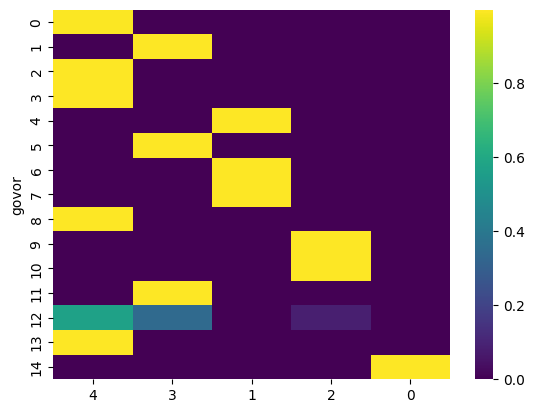

In [25]:
topic_distributions = []
for i, bow in enumerate(corpus):
    topics = lda_model.get_document_topics(bow)
    dist = {t[0]: t[1] for t in topics}
    dist['govor'] = i
    topic_distributions.append(dist)

df_topics = pd.DataFrame(topic_distributions).fillna(0)
print(df_topics)

sns.heatmap(df_topics.set_index('govor'), cmap='viridis')

Kvalitativni zaključak

Iako ASR transkripti sadrže pogreške u prepoznavanju pojedinih riječi i vlastitih imena, utjecaj tih pogrešaka na rezultate topic modelinga i word embeddingsa pokazao se minimalnim. Razlog tome je činjenica da su korištene metode temeljene na frekvenciji i kontekstu dominantnih pojmova, koji su stabilni i pravilno prepoznati u većini slučajeva.